##### Set Up

In [1]:
## imports and dependencies 

# standard libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.linear_model import LinearRegression

# data split
from sklearn.model_selection import train_test_split

# scaling 
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error

##### Data

In [2]:
# data
df = pd.read_csv("region_dataset.csv")

In [3]:
# feature reduction
df = df.drop(['Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ', 'Pos_AM', 'Pos_CB', 'Pos_CF', 'Pos_CM', 'Pos_DF', 'Pos_DM', 'Pos_FW', 'Pos_FW,DF', 'Pos_FW,MF', 'Pos_LB', 'Pos_LM', 'Pos_LW', 'Pos_MF', 'Pos_MF,DF', 'Pos_RB', 'Pos_RM',	'Pos_RW', 'Pos_SS'], axis=1)

##### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9) 
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

Number of Principal Components: 1
Cumulative Explained Variance: 0.3461982456219417

Number of Principal Components: 1
Cumulative Explained Variance: 0.5019836613265314

Number of Principal Components: 1
Cumulative Explained Variance: 0.5543274214936115

Number of Principal Components: 1
Cumulative Explained Variance: 0.5971541673738867

Number of Principal Components: 1
Cumulative Explained Variance: 0.629334700042103

Number of Principal Components: 1
Cumulative Explained Variance: 0.6546500486894477

Number of Principal Components: 1
Cumulative Explained Variance: 0.6729573341979043

Number of Principal Components: 1
Cumulative Explained Variance: 0.6894336214201588

Number of Principal Components: 1
Cumulative Explained Variance: 0.7047195233993361

Number of Principal Components: 1
Cumulative Explained Variance: 0.7198813234781286

Number of Principal Components: 1
Cumulative Explained Variance: 0.7325449580060649

Number of Principal Components: 1
Cumulative Explained Variance: 0

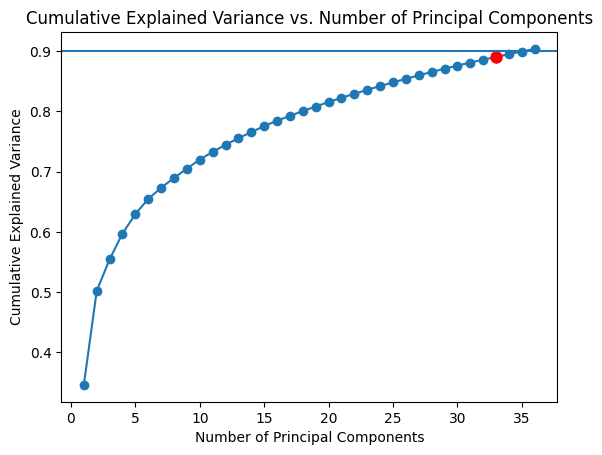

Critical Principal Component: 36


In [8]:
# PCA
x_train_pca = pca.fit_transform(x_train_scaled)

# critical value
lst = []

# cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# iterate through different numbers of principal components
for i in range(1, len(cumulative_explained_variance) + 1):
    if cumulative_explained_variance[i-1] >= 0.9:
        lst.append(i)
    print("Number of Principal Components: " + str(1))
    print(f"Cumulative Explained Variance: {cumulative_explained_variance[i-1]}")
    print("")

# plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.plot(33, cumulative_explained_variance[32], color='r', marker='o', markersize=8)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.9)
plt.title("Cumulative Explained Variance vs. Number of Principal Components")
plt.show()

print("Critical Principal Component: " + str(lst[0]))


In [9]:
# Critical PCA
pca = PCA(n_components=33)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

##### Models

In [10]:
# Linear Regressor 
LR = LinearRegression()

In [11]:
# PCA model
LR.fit(x_train_pca, y_train)
y_pred = LR.predict(x_test_pca)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.45004025226918826


In [12]:
# scaled model
LR.fit(x_train_scaled, y_train)
y_pred = LR.predict(x_test_scaled)

mae_scaled = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_scaled)

Mean Absolute Error: 0.41843388598172343


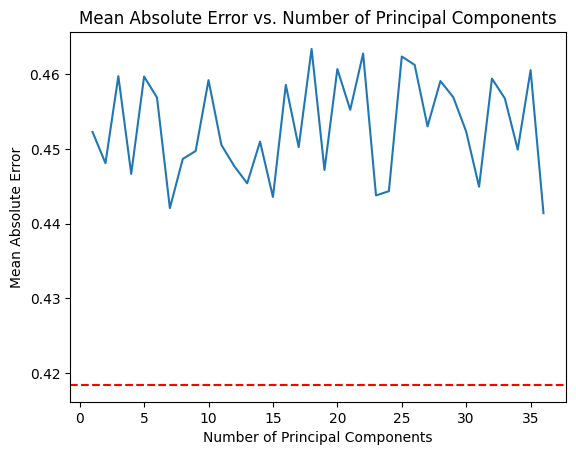

In [13]:
# iterate through values of n_components
num_components = []
mae_values = []

for i in range(1, len(cumulative_explained_variance) + 1):

    pca = PCA(n_components=33)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)   

    LR = LinearRegression()

    LR.fit(x_train_pca, y_train)
    y_pred = LR.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    num_components.append(i)
    mae_values.append(mae)

plt.plot(num_components, mae_values)
plt.axhline(y=mae_scaled, color='r', ls='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.show()

In [14]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(36, 0.44140529883496954)